# LASSO Regression to predict the price of used cars

In [2]:
#Importing all the Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# loading the data
df = pd.read_csv(r'C:\Users\vishnu prince\Desktop\Second Semester\Applied ML\Project\cars\cars.csv')

In [4]:
#Dropping the records with odometer_value < 500 or price_usd < 1000$ 
df.drop(df[df['odometer_value'] < 500].index, inplace = True)
df.drop(df[df['price_usd'] < 1000].index, inplace = True)

In [5]:
df.describe(include='all')

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
count,34335,34335,34335,34335,34335.000000,34335.000000,34335,34335,34335,34325.000000,...,34335,34335,34335,34335,34335,34335,34335,34335,34335,34335.000000
unique,55,1079,2,12,NaN,NaN,6,2,3,NaN,...,2,2,2,2,2,2,2,2,2,NaN
top,Volkswagen,Passat,mechanical,black,NaN,NaN,gasoline,False,gasoline,NaN,...,True,False,False,False,False,False,False,False,True,NaN
freq,3860,1296,21895,7358,NaN,NaN,20735,33166,22134,NaN,...,22891,25892,23854,25222,20835,27828,24322,18570,21435,NaN
mean,NaN,NaN,NaN,NaN,249114.207398,2003.848668,NaN,NaN,NaN,2.093043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.104587
std,NaN,NaN,NaN,NaN,126164.640763,7.299080,NaN,NaN,NaN,0.689084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.863094
min,NaN,NaN,NaN,NaN,500.000000,1942.000000,NaN,NaN,NaN,0.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,160000.000000,1999.000000,NaN,NaN,NaN,1.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
50%,NaN,NaN,NaN,NaN,247000.000000,2004.000000,NaN,NaN,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.000000
75%,NaN,NaN,NaN,NaN,320000.000000,2009.000000,NaN,NaN,NaN,2.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000


In [6]:
#To check for the null values in each column
df.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [7]:
#Removing irrelavant variables
df = df.drop(['location_region','number_of_photos','up_counter','feature_0',
                            'feature_1','feature_2','feature_3','feature_4','feature_5'
                            ,'feature_6','feature_7','feature_8','feature_9',
                            'duration_listed'], axis=1)

In [8]:
#Dropping Null values in engine_capacity column
df = df.dropna(subset=['engine_capacity'])

In [9]:
#All the columns with object datatype are stored in object_columns
object_columns = list(df.select_dtypes(include=['object']).columns)

In [10]:
#Doing One Hot Encoding on all the columns with object type
df_encoded = pd.get_dummies(data=df, columns=object_columns)
df_encoded.dtypes
df_encoded.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,manufacturer_name_Acura,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,...,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear
0,190000,2010,False,2.5,False,10900.00,False,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,290000,2002,False,3.0,False,5000.00,True,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,402000,2001,False,2.5,False,2800.00,True,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,10000,1999,False,3.0,False,9999.00,True,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,280000,2001,False,2.5,False,2134.11,True,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [11]:
#Defining the X variable
X = df_encoded.drop('price_usd', axis=1)

In [12]:
#Defining the y Variable
y = df_encoded['price_usd']

In [13]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Initializing the Lasso regression with alpha as 0
Lasso_model = linear_model.Lasso(alpha=0,random_state=42)

In [27]:
#Training and testing the model
Lasso_model.fit(X_train, y_train)
pred = Lasso_model.predict(X_test)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74026479628.22903, tolerance: 88534329.34160054
  positive)


In [28]:
#R^2 Value
Lasso_model.score(X_train,y_train)

0.8327733881789388

In [29]:
#To get all the coefficient values of all the independent variables
Lasso_model.coef_

array([-5.20133781e-03,  5.76275419e+02, -2.35270671e+02, ...,
        1.72497324e+03,  4.07896094e+02, -3.71372578e+02])

In [30]:
#Creating a table with Features and their corresponding estimate values
Lasso_model_summary = pd.DataFrame(X.columns.values,columns=['Features'])
Lasso_model_summary['Estimates']=Lasso_model.coef_
Lasso_model_summary

,Features,Estimates
0,odometer_value,-5.201338e-03
1,year_produced,5.762754e+02
2,engine_has_gas,-2.352707e+02
3,engine_capacity,-5.011648e+02
4,has_warranty,3.217792e+03
...,...,...
1171,state_emergency,-2.887682e+03
1172,state_owned,1.052108e-09
1173,drivetrain_all,1.724973e+03
1174,drivetrain_front,4.078961e+02


In [31]:
#Performance Metrics of the model: Mean Absolute Error, Mean squared error, R^2
print("Mean absolute error",mean_absolute_error(y_test, pred))
print("Mean Squared error",mean_squared_error(y_test, pred))
print("R2",r2_score(y_test, pred)*100)

Mean absolute error 1675.9677000065406
Mean Squared error 7352447.586684654
R2 79.62301934317483


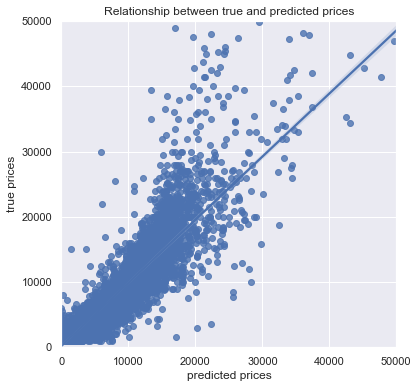

In [36]:
#Plot Between predicted Prices and the actual prices of used-cars
plt.figure(figsize= (6, 6))
sns.regplot(pred, y_test)
plt.ylabel('true prices')
plt.xlabel('predicted prices')
plt.title('Relationship between true and predicted prices')
axes = plt.gca()
axes.set_xlim([0,50000])
axes.set_ylim([0,50000])
plt.show()

In [21]:
from sklearn.linear_model import LassoCV

In [22]:
#Checking the model with different alpha values and fitting the model on training splits
model_lasso = LassoCV(cv=3, alphas = [1, 0.1,0.2,0.5,0.8, 0.001, 0.0005],random_state=41).fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46922659233.27594, tolerance: 57894371.687706925
  tol, rng, random, positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46888685732.39866, tolerance: 57894371.687706925
  tol, rng, random, positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51032822670.4817, tolerance: 59819683.03229532
  tol, rng, random, positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

In [23]:
#Testing on the test split
pred1 = model_lasso.predict(X_test)

In [24]:
print("Mean absolute error",mean_absolute_error(y_test, pred1))
print("Mean Squared error",mean_squared_error(y_test, pred1))
print("R2",r2_score(y_test, pred1)*100)

Mean absolute error 1671.6744887214625
Mean Squared error 7238888.977130899
R2 79.93774196622127


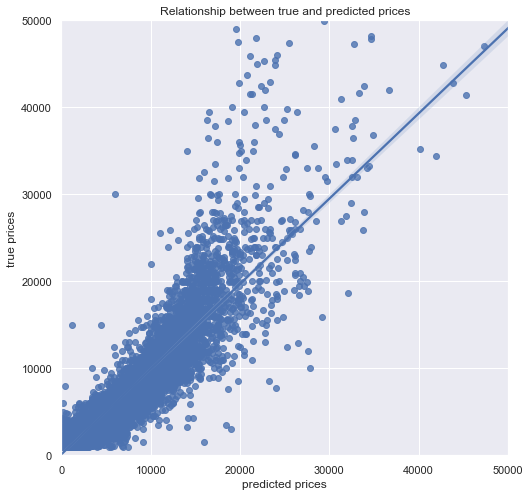

In [25]:
#Plot Between predicted Prices and the actual prices of used-cars
plt.figure(figsize= (8, 8))
sns.regplot(pred1, y_test)
plt.ylabel('true prices')
plt.xlabel('predicted prices')
plt.title('Relationship between true and predicted prices')
axes = plt.gca()
axes.set_xlim([0,50000])
axes.set_ylim([0,50000])
plt.show()